In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsforecast.models import AutoETS
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

/home/grc/arep/time_series/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


As vezes é útil fazer uma técnica chamada backcast, que consiste em prever o tempo passado, ou seja, não o futuro, mas o passado.

#### 1.0. Aus Eggs

In [2]:
df = pd.read_csv("../data/eggs.csv")

df["logeggs"] = np.log1p(df["eggs"])

df["year"] = pd.to_datetime(df.year, format="%Y")

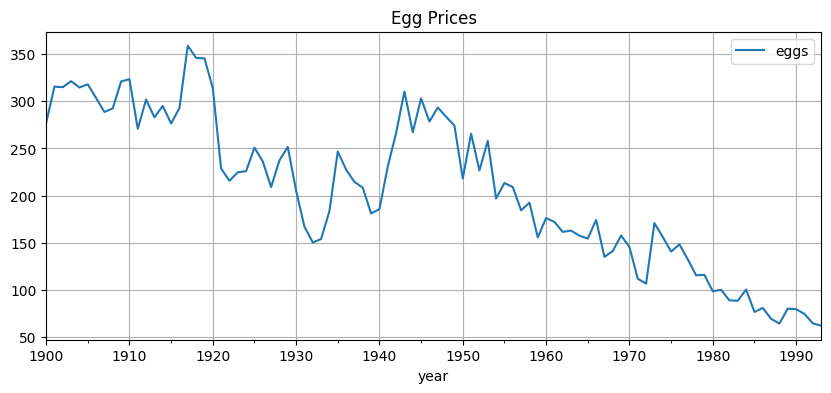

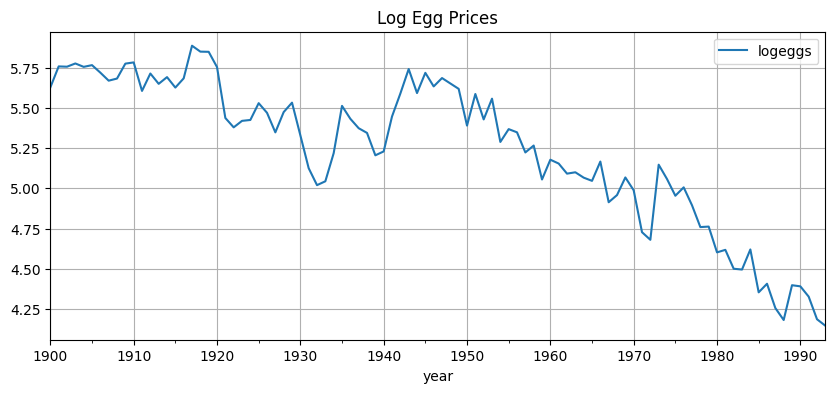

In [3]:
df.plot(x="year", y="eggs", grid=2, figsize=(10, 4), title="Egg Prices");

df.plot(x="year", y="logeggs", grid=2, figsize=(10, 4), title="Log Egg Prices");

In [4]:
df["rever_eggs"] = list(reversed(df["eggs"]))

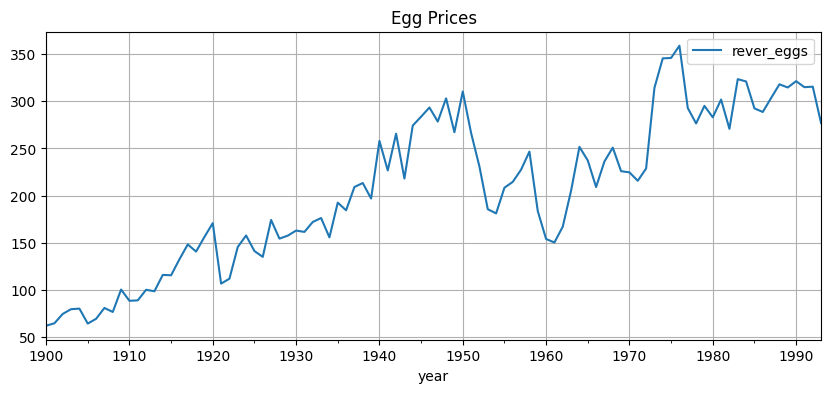

In [5]:
df.plot(x="year", y="rever_eggs", grid=2, figsize=(10, 4), title="Egg Prices");

In [6]:
ets = AutoETS(
    season_length=1,
    model="AAN"
).fit(df["rever_eggs"].to_numpy())

ets.model_

{'loglik': -521.2963699726471,
 'aic': 1052.5927399452942,
 'bic': 1065.3092138566442,
 'aicc': 1053.2745581271124,
 'mse': 697.9289765612244,
 'amse': 1191.0855329689032,
 'fit': results(x=array([8.34285039e-01, 1.00000000e-04, 5.98718486e+01, 2.37604980e+00]), fn=1042.5927399452942, nit=80, simplex=array([[8.35807986e-01, 1.00000000e-04, 5.98192046e+01, 2.38755035e+00],
        [8.34285039e-01, 1.00000000e-04, 5.98718486e+01, 2.37604980e+00],
        [8.33979844e-01, 1.00000000e-04, 6.06037950e+01, 2.38443558e+00],
        [8.34229674e-01, 1.00000000e-04, 6.01639397e+01, 2.40815876e+00],
        [8.35694583e-01, 1.00000000e-04, 6.02116954e+01, 2.35441646e+00]])),
 'residuals': array([ 2.21016012e-02,  2.17610555e-01,  7.58998755e+00,  3.88094172e+00,
        -1.16409076e+00, -1.83800117e+01, -3.71109374e-01,  9.06327228e+00,
        -5.13421586e+00,  2.05135614e+01, -1.08882696e+01, -3.73093395e+00,
         8.21551674e+00, -2.58559920e+00,  1.45047529e+01, -3.24570602e-01,
         

In [7]:
forecast = pd.DataFrame(ets.predict(h=15, level=[90]))

date_range = pd.date_range(
    start=df.year.min() - pd.offsets.DateOffset(years=len(forecast)),
    end=df.year.min(), 
    freq="YS"
)[:-1]

forecast["year"] = list(reversed(date_range))

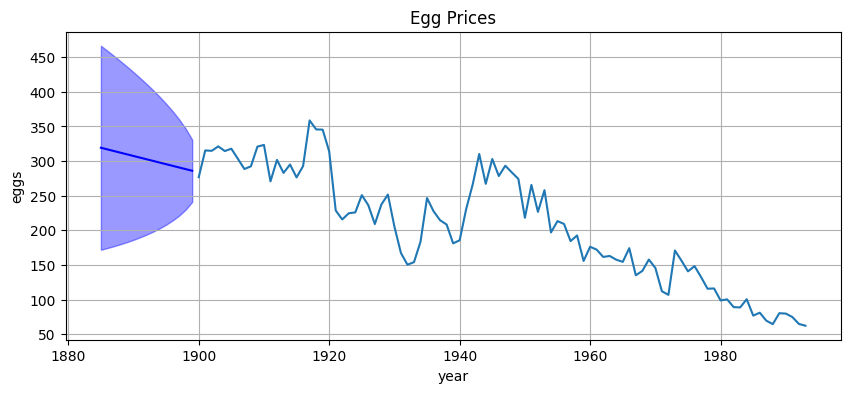

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(df, x="year", y="eggs", ax=ax)
sns.lineplot(forecast, x="year", y="mean", ax=ax, color="b")
ax.fill_between(forecast["year"], forecast["lo-90"], forecast["hi-90"], color="b", alpha=0.4)
ax.set_title("Egg Prices")
ax.grid(2)